- This notebook implements linear regression from scratch using NumPy, on a dataset with a single feature - TotalHours

- We use the Zuu Crew dataset, focusing only on students who completed the *Foundations of ML* course.

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys, os
sys.path.append(os.path.dirname(os.getcwd()))

In [ ]:
from reusable_modules.metrics import MSE, MAE, RMSE, R2_Score
from reusable_modules.gd_linear import compute_cost, compute_gradients, gradient_descent 
from reusable_modules.constants import (
   learning_rates , iteration_counts 
)


Load & filter dataset

In [33]:
df = pd.read_csv('data/zuu crew scores.csv')
df = df[df['CourseName'] == 'Foundations of ML']
df.head(5)

,MemberName,EducationLevel,Attendance,TotalHours,AssignmentsCompleted,HackathonParticipation,GitHubScore,PeerReviewScore,CourseName,CapstoneScore
0,Theekshana Rathnayake,3,79.9,43.7,2,0,62.8,5.0,Foundations of ML,45.3
1,Mayura Sandakalum Sellapperuma,2,76.8,95.6,6,0,87.4,2.7,Foundations of ML,78.8
2,Amila Narangoda,3,96.6,75.9,8,0,98.4,2.8,Foundations of ML,65.4
4,Tharusha Vihanga,2,83.2,24.0,6,0,41.8,4.2,Foundations of ML,40.1
7,Chamath Perera,3,86.5,88.0,5,0,23.9,1.3,Foundations of ML,68.2


Base feature & target

In [ ]:
X_raw = df['TotalHours'].values
#.reshape(-1, 1)
y = df['CapstoneScore'].values

Manual train/test split

In [35]:
def train_test_split_np(X, y, test_size=0.2, seed=42):
    rng = np.random.default_rng(seed)
    m = X.shape[0]
    idx = np.arange(m)
    rng.shuffle(idx)
    m_test = int(np.round(m * test_size))
    test_idx = idx[:m_test]
    train_idx = idx[m_test:]
    return X[train_idx], X[test_idx], y[train_idx], y[test_idx]

X_train_raw, X_test_raw, y_train, y_test = train_test_split_np(X_raw, y, test_size=0.2, seed=42)

Feature Standardization

In [36]:
mu, sd = X_train_raw.mean(), X_train_raw.std() + 1e-12
X_train = (X_train_raw - mu) / sd
X_test  = (X_test_raw  - mu) / sd

Inspect shapes

In [37]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test  shape:", X_test.shape)
print("y_test  shape:", y_test.shape)

X_train shape: (58,)
y_train shape: (58,)
X_test  shape: (14,)
y_test  shape: (14,)


Relationship Between Study Hours and Capstone Score

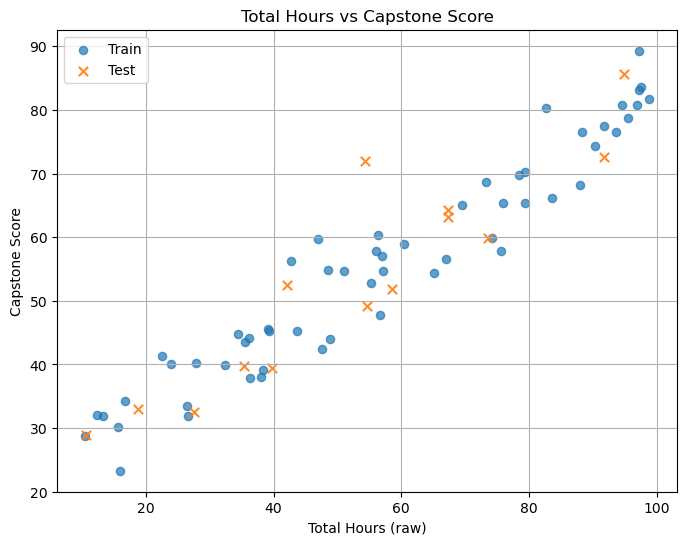

In [38]:
plt.figure(figsize=(8,6))
plt.scatter(X_train_raw, y_train, alpha=0.7, s=35, label="Train")
plt.scatter(X_test_raw,  y_test,  alpha=0.9, s=45, marker="x", label="Test")
plt.xlabel('Total Hours (raw)')
plt.ylabel('Capstone Score')
plt.title('Total Hours vs Capstone Score')
plt.grid(True)
plt.legend()
plt.show()


Prediction Function

- Hypothesis: ŷ = β₀ + β₁x

In [39]:
def predict(X, beta_0, beta_1):
    return beta_0 + beta_1 * X

In [41]:
results = {}

for lr in learning_rates:
    for num_itr in iteration_counts:
        print(f"=======  Training with α = {lr} , iterations = {num_itr}  =======")
        beta_0, beta_1, cost_history = gradient_descent(X_train, y_train, learning_rate=lr, num_itr=num_itr)
        results[(lr,num_itr)] = {
            "beta_0":  beta_0 ,
            "beta_1":   beta_1,
            "cost_history": cost_history
        }
        print()

=======  Training with α = 1e-05 , iterations = 1000  =======
beta values:
  β₀ = -2.332499280824261
  β₁ = 0.8824564349221734
Iteration 0: Cost = 1805.8437
Iteration 100: Cost = 1802.2565
Iteration 200: Cost = 1798.6765
Iteration 300: Cost = 1795.1037
Iteration 400: Cost = 1791.5380
Iteration 500: Cost = 1787.9794
Iteration 600: Cost = 1784.4279
Iteration 700: Cost = 1780.8835
Iteration 800: Cost = 1777.3462
Iteration 900: Cost = 1773.8160

=======  Training with α = 1e-05 , iterations = 5000  =======
beta values:
  β₀ = 0.06423972457147153
  β₁ = 0.48508009550017017
Iteration 0: Cost = 1676.1494
Iteration 100: Cost = 1672.8214
Iteration 200: Cost = 1669.5000
Iteration 300: Cost = 1666.1853
Iteration 400: Cost = 1662.8771
Iteration 500: Cost = 1659.5756
Iteration 600: Cost = 1656.2807
Iteration 700: Cost = 1652.9923
Iteration 800: Cost = 1649.7106
Iteration 900: Cost = 1646.4353
Iteration 1000: Cost = 1643.1667
Iteration 1100: Cost = 1639.9045
Iteration 1200: Cost = 1636.6489
Iteratio

Convergence Analysis by Learning Rate - Train cost

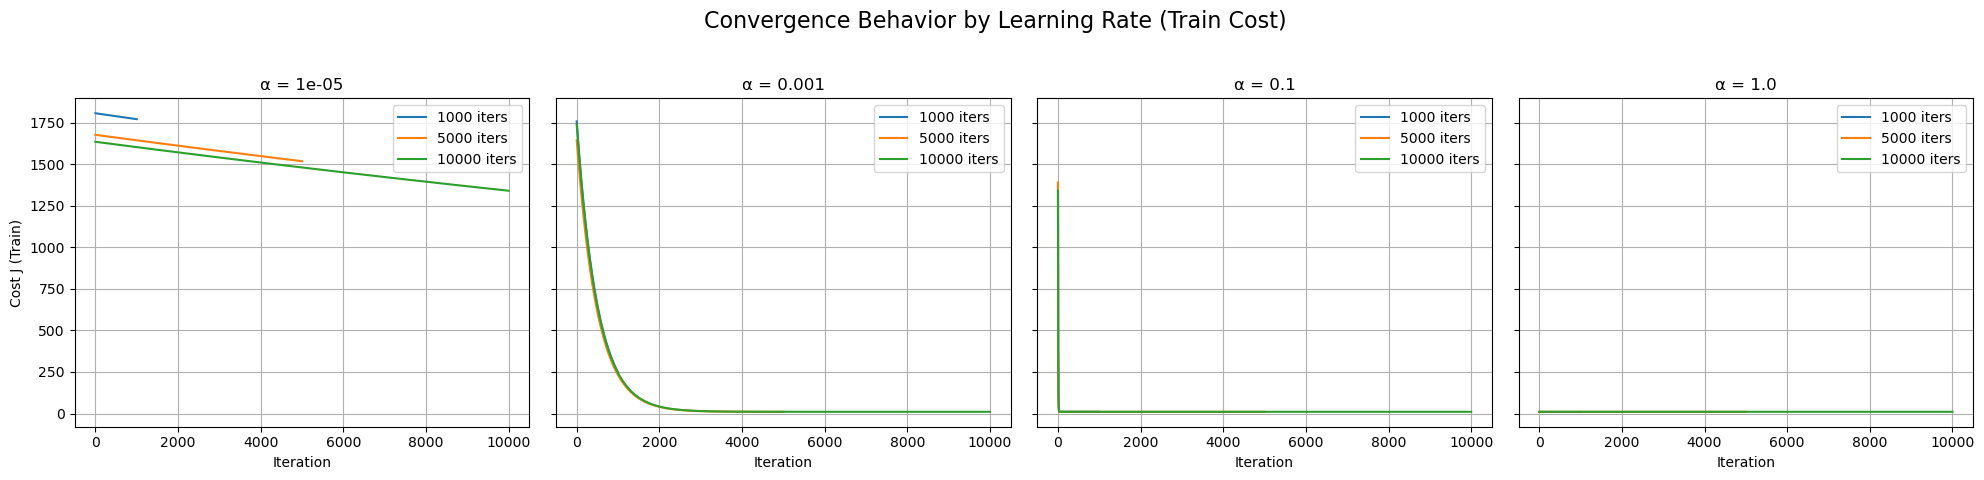

In [42]:
fig, axs = plt.subplots(1, len(learning_rates), figsize=(20, 5), sharey=True)
for i, lr in enumerate(learning_rates):
    ax = axs[i]
    for n_iter in sorted(iteration_counts):
        key = (lr, n_iter)
        if key in results:
            ch = results[key]['cost_history']
            ax.plot(range(len(ch)), ch, label=f'{n_iter} iters')
    ax.set_title(f'α = {lr}')
    ax.set_xlabel('Iteration')
    if i == 0:
        ax.set_ylabel('Cost J (Train)')
    ax.grid(True)
    ax.legend()
plt.suptitle("Convergence Behavior by Learning Rate (Train Cost)", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Summary Table

In [43]:
summary_rows = []

for (lr, num_itr), result in results.items():
    b0 = result['beta_0']
    b1 = result['beta_1']
    cost_history = result['cost_history']

    # Predictions on each split
    yhat_train = predict(X_train, b0, b1)
    yhat_test  = predict(X_test,  b0, b1)

    summary_rows.append({
        "Learning Rate (α)": lr,
        "Iterations": num_itr,
        "β₀": round(b0, 6),
        "β₁": round(b1, 6),

        # This cost history was computed on TRAIN during GD
        "Final Cost (Train)": round(cost_history[-1], 6),

        # Train metrics
        "Train MSE":  round(MSE(y_train, yhat_train), 6),
        "Train MAE":  round(MAE(y_train, yhat_train), 6),
        "Train RMSE": round(RMSE(y_train, yhat_train), 6),
        "Train R²":   round(R2_Score(y_train, yhat_train), 6),

        # Test metrics
        "Test MSE":   round(MSE(y_test, yhat_test), 6),
        "Test MAE":   round(MAE(y_test, yhat_test), 6),
        "Test RMSE":  round(RMSE(y_test, yhat_test), 6),
        "Test R²":    round(R2_Score(y_test, yhat_test), 6),
    })

summary_df = (
    pd.DataFrame(summary_rows)
      .sort_values(by=["Test RMSE", "Final Cost (Train)"], ascending=[True, True])
      .reset_index(drop=True)
)

summary_df


,Learning Rate (α),Iterations,β₀,β₁,Final Cost (Train),Train MSE,Train MAE,Train RMSE,Train R²,Test MSE,Test MAE,Test RMSE,Test R²
0,0.10000,1000,55.570690,16.310780,10.473364,20.946728,3.689859,4.576760,0.927012,41.289453,4.975695,6.425687,0.850377
1,0.10000,5000,55.570690,16.310780,10.473364,20.946728,3.689859,4.576760,0.927012,41.289453,4.975695,6.425687,0.850377
2,0.10000,10000,55.570690,16.310780,10.473364,20.946728,3.689859,4.576760,0.927012,41.289453,4.975695,6.425687,0.850377
3,1.00000,1000,55.570690,16.310780,10.473364,20.946728,3.689859,4.576760,0.927012,41.289453,4.975695,6.425687,0.850377
4,1.00000,5000,55.570690,16.310780,10.473364,20.946728,3.689859,4.576760,0.927012,41.289453,4.975695,6.425687,0.850377
5,1.00000,10000,55.570690,16.310780,10.473364,20.946728,3.689859,4.576760,0.927012,41.289453,4.975695,6.425687,0.850377
6,0.00100,10000,55.568142,16.310017,10.473367,20.946735,3.690207,4.576760,0.927012,41.291458,4.975643,6.425843,0.850370
7,0.00100,5000,55.197579,16.217950,10.547279,21.094557,3.749843,4.592881,0.926497,41.702185,4.969369,6.457723,0.848881
8,0.00100,1000,34.826665,9.764316,247.058750,494.117500,20.744025,22.228754,-0.721734,480.626880,19.951922,21.923204,-0.741677
9,0.00001,10000,5.987137,2.153446,1339.952758,2679.905515,49.583552,51.767804,-8.338031,2481.262158,47.555440,49.812269,-7.991501


Plot regression line

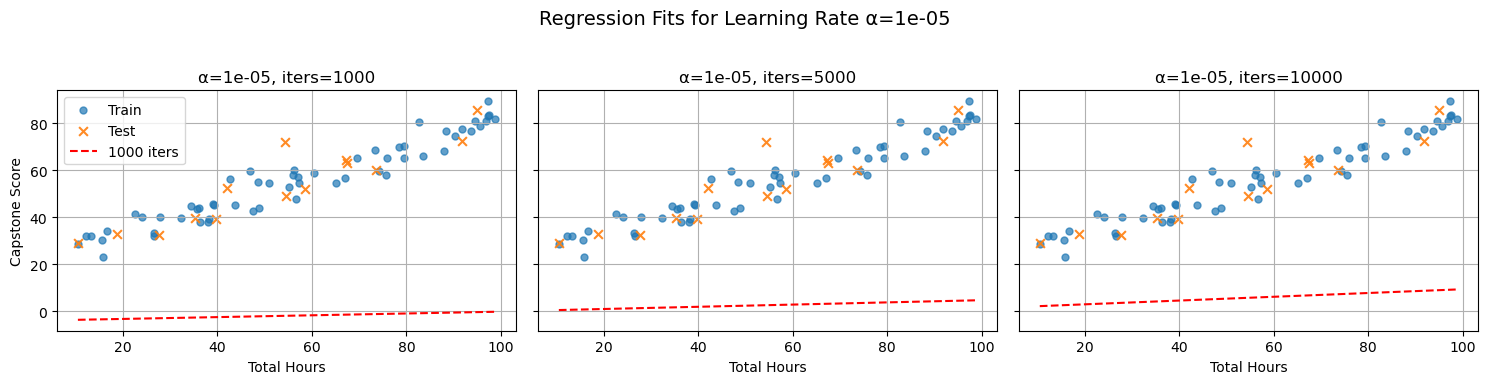

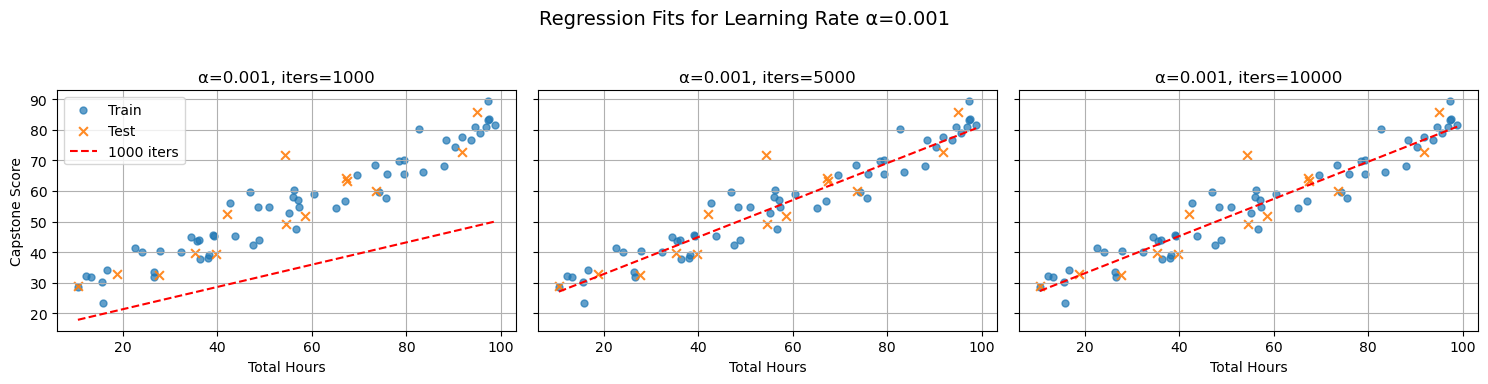

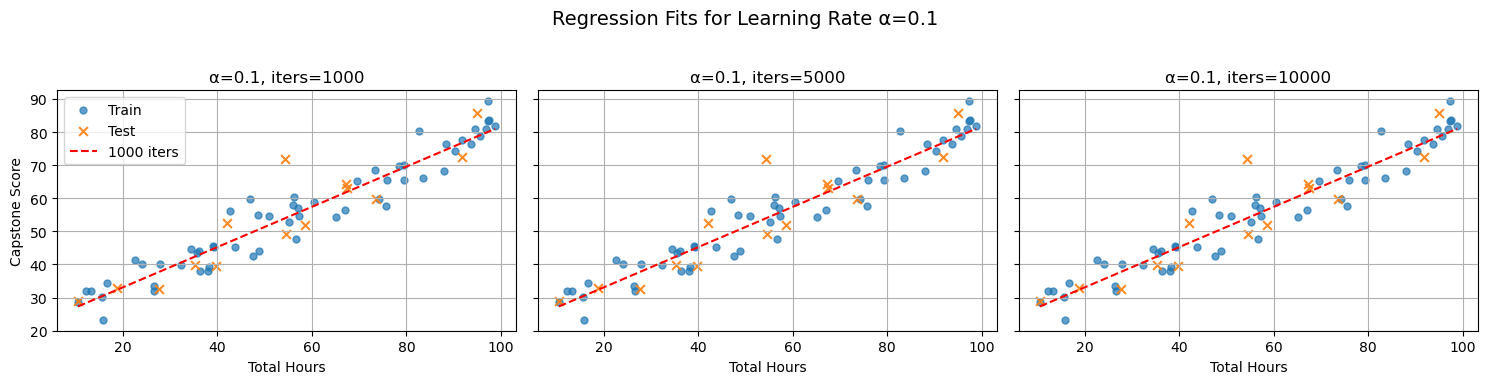

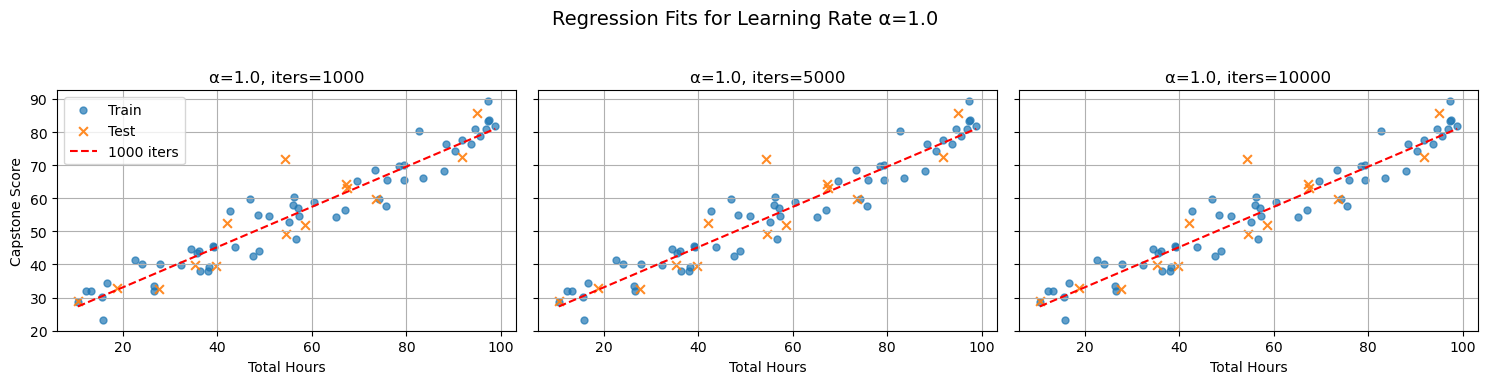

In [44]:

for lr in learning_rates:
    fig, axs = plt.subplots(1, len(iteration_counts), figsize=(15, 4), sharey=True)
    axs = np.atleast_1d(axs)  
    
    for j, num_itr in enumerate(sorted(iteration_counts)):
        ax = axs[j]
        b0 = results[(lr, num_itr)]["beta_0"]
        b1 = results[(lr, num_itr)]["beta_1"]

        # For a smooth fit line: sort raw X values
        order = np.argsort(X_raw)
        X_sorted_raw = X_raw[order]
        X_sorted_std = (X_sorted_raw - mu) / sd
        y_hat_sorted = predict(X_sorted_std, b0, b1)

        # Scatter train vs test
        ax.scatter(X_train_raw, y_train, label="Train", alpha=0.7, s=25)
        ax.scatter(X_test_raw,  y_test,  label="Test",  alpha=0.9, s=40, marker="x")

        # Regression line
        ax.plot(X_sorted_raw, y_hat_sorted, 'r--', label=f'{num_itr} iters')

        ax.set_title(f"α={lr}, iters={num_itr}")
        ax.set_xlabel("Total Hours")
        if j == 0:
            ax.set_ylabel("Capstone Score")
        ax.grid(True)
        if j == 0:   # only show legend once per row
            ax.legend()

    plt.suptitle(f"Regression Fits for Learning Rate α={lr}", fontsize=14)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
